## Assignment 5.2

In [1]:
 # Loading the Reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
# Decoding newswires back to text (for testing)
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [3]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [4]:
# Encoding the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#Vectorizing training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
    
#Vectorizing training and test data
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [6]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
# Model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
# Compiling the model
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [9]:
#  Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
# Training the model
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 85ms/step - loss: 2.6864 - accuracy: 0.4951 - val_loss: 1.8390 - val_accuracy: 0.6210
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.5523 - accuracy: 0.6729 - val_loss: 1.3865 - val_accuracy: 0.6840
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.1961 - accuracy: 0.7328 - val_loss: 1.1959 - val_accuracy: 0.7270
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.9790 - accuracy: 0.7798 - val_loss: 1.0737 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8152 - accuracy: 0.8212 - val_loss: 0.9906 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6748 - accuracy: 0.8533 - val_loss: 0.9341 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5642 - accuracy: 0.8768 - val_loss: 0.9109 - val_accuracy: 0.8000
Epoch 8/20
16

In [11]:
history.history

{'loss': [2.6864066123962402,
  1.552306056022644,
  1.1960618495941162,
  0.9790068864822388,
  0.8151661157608032,
  0.6748158931732178,
  0.5642168521881104,
  0.4744778573513031,
  0.3979281187057495,
  0.34164759516716003,
  0.294569194316864,
  0.26260992884635925,
  0.2289617508649826,
  0.20403826236724854,
  0.18825475871562958,
  0.17280706763267517,
  0.15855418145656586,
  0.15214364230632782,
  0.14142991602420807,
  0.13653315603733063],
 'accuracy': [0.4951139986515045,
  0.672888994216919,
  0.7327737212181091,
  0.7797544598579407,
  0.821222722530365,
  0.8532949090003967,
  0.8768479228019714,
  0.8972688317298889,
  0.9168128371238708,
  0.9294663071632385,
  0.9358556866645813,
  0.9413681030273438,
  0.947256326675415,
  0.9491355419158936,
  0.9518917798995972,
  0.9533951282501221,
  0.9551491141319275,
  0.9559007883071899,
  0.9551491141319275,
  0.9555249214172363],
 'val_loss': [1.839016079902649,
  1.3864736557006836,
  1.195912480354309,
  1.07371389865875

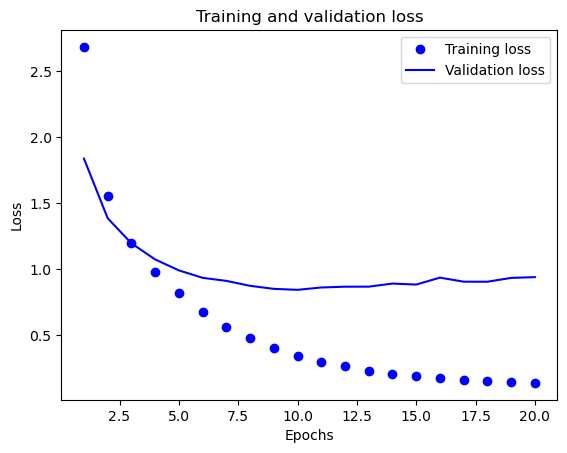

In [12]:
#  Plotting the training and validation loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

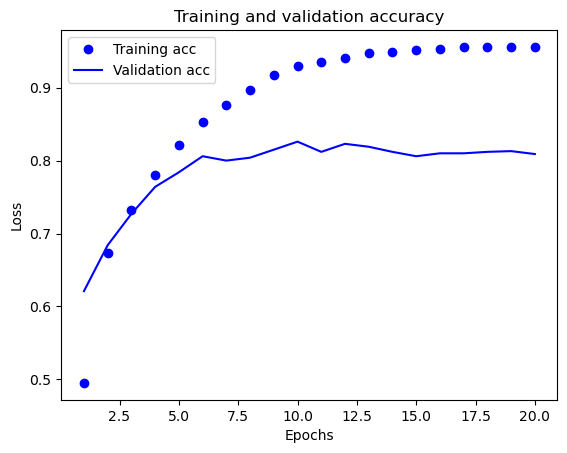

In [13]:
# Plotting the training and validation accuracy

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 75ms/step - loss: 2.7565 - accuracy: 0.4957 - val_loss: 1.9034 - val_accuracy: 0.6030
Epoch 2/9
16/16 [==============================] - 1s 49ms/step - loss: 1.5856 - accuracy: 0.6631 - val_loss: 1.4101 - val_accuracy: 0.7000
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 1.2111 - accuracy: 0.7365 - val_loss: 1.2126 - val_accuracy: 0.7340
Epoch 4/9
16/16 [==============================] - 1s 48ms/step - loss: 0.9839 - accuracy: 0.7841 - val_loss: 1.0793 - val_accuracy: 0.7580
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8205 - accuracy: 0.8180 - val_loss: 1.0049 - val_accuracy: 0.7820
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.6828 - accuracy: 0.8499 - val_loss: 1.0075 - val_accuracy: 0.7750
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5722 - accuracy: 0.8784 - val_loss: 0.8964 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [15]:
results

[0.9483923316001892, 0.7876224517822266]

Accuracy of around 78%

In [16]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19590382902938558

In [17]:
#  Generating predictions for new data
predictions = model.predict(x_test)

71/71 [==============================] - 1s 5ms/step


In [18]:
predictions[0].shape, np.sum(predictions[0]),  np.argmax(predictions[0])

((46,), 1.0000001, 3)

In [19]:
# Different way of handling lables and loss
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [20]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy', #categorical_crossentropy, expects the labels to follow a categorical encoding. 
metrics=['acc'])

In [21]:
# A model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 29ms/step - loss: 3.2918 - accuracy: 0.2116 - val_loss: 2.7866 - val_accuracy: 0.3710
Epoch 2/20
63/63 [==============================] - 1s 23ms/step - loss: 2.4571 - accuracy: 0.3726 - val_loss: 2.2554 - val_accuracy: 0.4010
Epoch 3/20
63/63 [==============================] - 1s 24ms/step - loss: 1.9904 - accuracy: 0.4260 - val_loss: 1.8122 - val_accuracy: 0.5460
Epoch 4/20
63/63 [==============================] - 1s 23ms/step - loss: 1.5713 - accuracy: 0.6027 - val_loss: 1.5647 - val_accuracy: 0.6250
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 1.3776 - accuracy: 0.6433 - val_loss: 1.4942 - val_accuracy: 0.6370
Epoch 6/20
63/63 [==============================] - 2s 24ms/step - loss: 1.2580 - accuracy: 0.6619 - val_loss: 1.4478 - val_accuracy: 0.6590
Epoch 7/20
63/63 [==============================] - 2s 25ms/step - loss: 1.1778 - accuracy: 0.6868 - val_loss: 1.4364 - val_accuracy: 0.6570
Epoch 8/20
63